In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('wine.data',header=None, usecols=[0,1,2])
df.columns = ['Class Label','Alcohol','Malic Acid']

In [5]:
df.sample(4)


,Class Label,Alcohol,Malic Acid
142,3,13.52,3.17
130,3,12.86,1.35
56,1,14.22,1.70
168,3,13.58,2.58


In [6]:
df.describe()

,Class Label,Alcohol,Malic Acid
count,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348
std,0.775035,0.811827,1.117146
min,1.000000,11.030000,0.740000
25%,1.000000,12.362500,1.602500
50%,2.000000,13.050000,1.865000
75%,3.000000,13.677500,3.082500
max,3.000000,14.830000,5.800000


<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

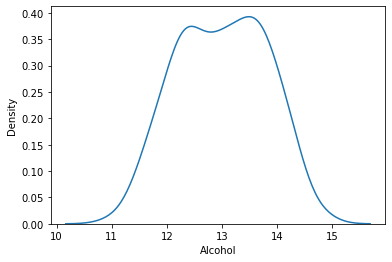

In [7]:
sns.kdeplot(df['Alcohol'])

<AxesSubplot:xlabel='Malic Acid', ylabel='Density'>

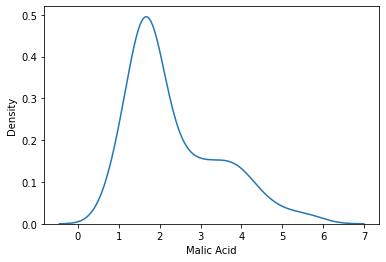

In [8]:
sns.kdeplot(df['Malic Acid'])

/home/batman/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alcohol', ylabel='Malic Acid'>

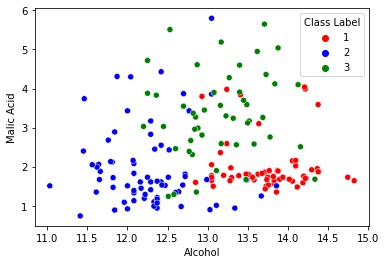

In [10]:
color_dict = {1:'red',2:'blue',3:'green'}
sns.scatterplot(df["Alcohol"],df['Malic Acid'],hue=df['Class Label'],palette=color_dict)

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop('Class Label',axis=1),
                                                df['Class Label'],
                                                test_size=0.3,
                                                random_state = 0)

In [13]:
X_train.shape, X_test.shape

((124, 2), (54, 2))

## MinMax scaler

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [16]:
np.round(X_train.describe(),1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [18]:
np.round(X_train_scaled.describe(),1)

## we can see that the mean value is 0 and max value is 1

,Alcohol,Malic Acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


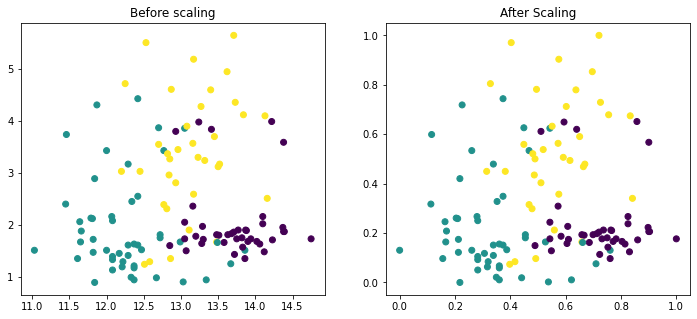

In [19]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(X_train['Alcohol'],X_train['Malic Acid'], c=y_train)
ax1.set_title("Before scaling")
ax2.scatter(X_train_scaled['Alcohol'],X_train_scaled['Malic Acid'], c=y_train)
ax2.set_title("After Scaling")
plt.show()

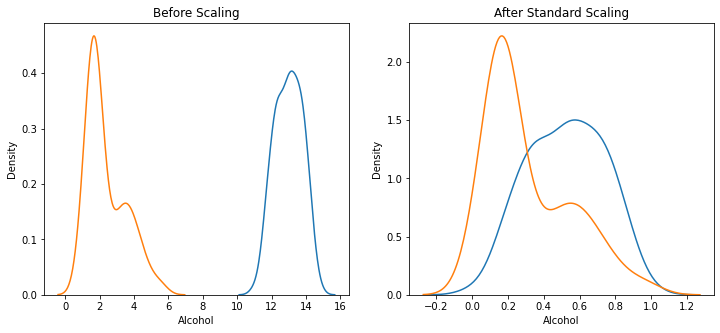

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic Acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic Acid'], ax=ax2)
plt.show()

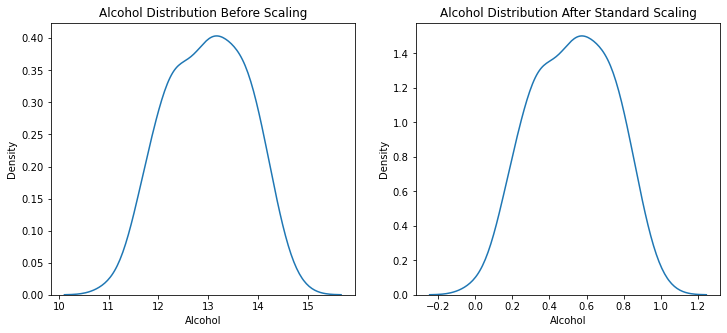

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
plt.show()

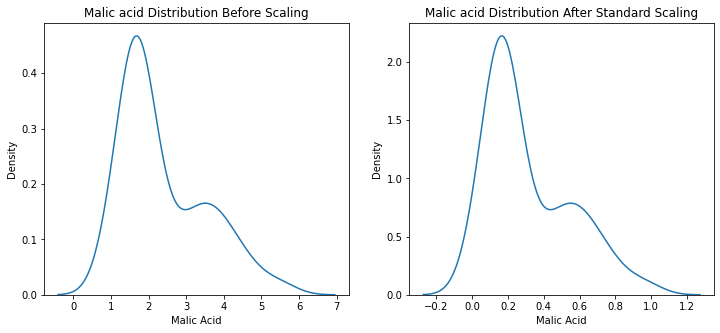

In [23]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(X_train['Malic Acid'], ax=ax1)

# after scaling
ax2.set_title('Malic acid Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Malic Acid'], ax=ax2)
plt.show()

### As we are seeing that only the values are changing
## the plot can also change, depending upon the situation